# Task 2 : Unemployment  Analysis With Python - By Harish Kumar

# Import Basic Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading The Dataset

In [ ]:
df=pd.read_csv("Unemployment in India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


# Checking Null Values

In [ ]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

## From exploring data we noticed that it needs some manipulation and cleaning before analyzing it.

# Data Cleaning

In [ ]:
df.dropna(inplace=True)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


# Checking headers of columns

In [ ]:
df.columns


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# Count Of Attributes.

In [ ]:
df['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [ ]:
#Observations in different regions aren't with the same frequency
df['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [ ]:
df['Date'].value_counts()

2019-10-31    55
2019-11-30    55
2019-05-31    54
2019-06-30    54
2019-07-31    54
2019-08-31    53
2019-12-31    53
2020-01-31    53
2020-02-29    53
2019-09-30    52
2020-03-31    52
2020-04-30    51
2020-05-31    51
2020-06-30    50
Name: Date, dtype: int64

In [ ]:
df['Frequency'].value_counts()

Monthly    740
Name: Frequency, dtype: int64

In [ ]:
#Unemployment rate and people employed are negatively correlated (weak correlation)
df['Estimated Employed'].corr(df['Estimated Unemployment Rate (%)'])

-0.22287639952214783

# Formatting column names

In [ ]:
# removing trailing and leading spaces from column names
df.columns = df.columns.str.strip()

In [ ]:
df['Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [ ]:
df["Frequency"]=df["Frequency"].str.strip()

In [ ]:
df['Frequency'].unique()

array(['Monthly'], dtype=object)

In [ ]:
# Converting to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extracting Month

In [ ]:
import calendar
df['month_int'] = df['Date'].dt.month
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


# Month Wise Visualization

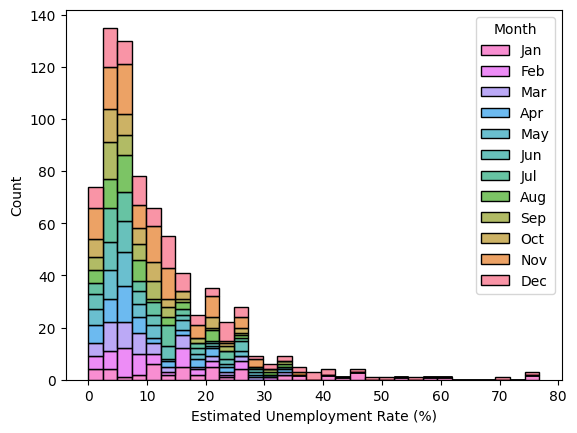

In [ ]:
sns.histplot(data=df, x="Estimated Unemployment Rate (%)", hue="month", multiple="stack")
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.legend(title="Month", loc="upper right", labels=month_order)

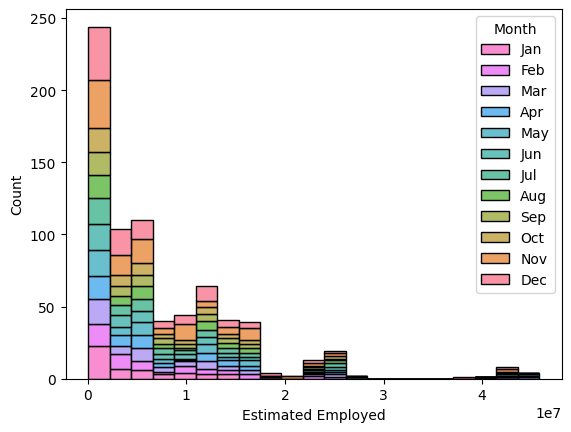

In [ ]:
sns.histplot(data=df, x="Estimated Employed", hue="month", multiple="stack")
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.legend(title="Month", loc="upper right", labels=month_order)

In [ ]:
data = df.groupby(['month'])[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].mean()
data=pd.DataFrame(data).reset_index()
data

,month,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Apr,23.641569,5.283320e+06,35.141176
1,Aug,9.637925,7.539815e+06,43.646792
2,Dec,9.497358,7.377388e+06,43.667358
3,Feb,9.964717,7.603996e+06,43.723019
4,Jan,9.950755,7.677344e+06,44.051321
5,Jul,9.033889,7.404425e+06,43.706667
6,Jun,10.553462,7.372280e+06,42.211058
7,Mar,10.700577,7.516581e+06,43.084038
8,May,16.646190,6.666624e+06,41.277143
9,Nov,9.868364,7.273661e+06,44.110545


<Axes: xlabel='Estimated Labour Participation Rate (%)', ylabel='month'>

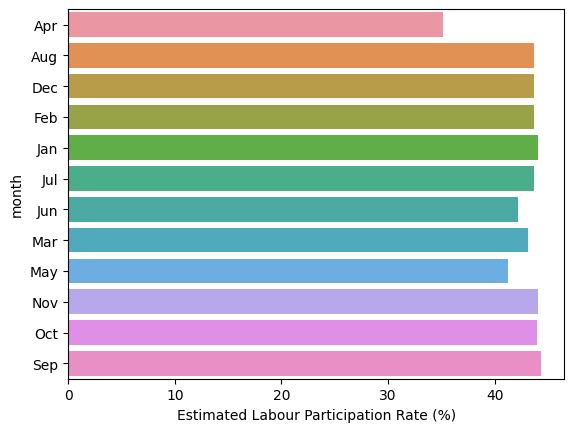

In [ ]:
sns.barplot(x="Estimated Labour Participation Rate (%)", y="month",data=data)

<Axes: xlabel='Estimated Employed', ylabel='month'>

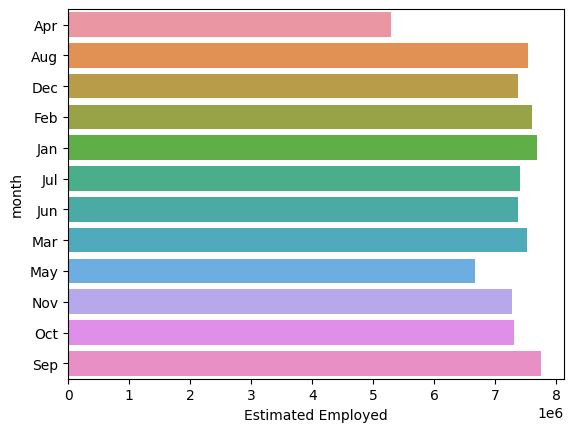

In [ ]:
sns.barplot(x="Estimated Employed", y="month",data=data)

# State wise Analysis

In [ ]:
## Grouping state wise
state =  df.groupby(['Region'])[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].mean()
state = pd.DataFrame(state).reset_index()
state

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,7.477143,8.154093e+06,39.375714
1,Assam,6.428077,5.354772e+06,44.868462
2,Bihar,18.918214,1.236619e+07,38.153929
3,Chandigarh,15.991667,3.168312e+05,39.336667
4,Chhattisgarh,9.240357,4.303499e+06,42.810714
5,Delhi,16.495357,2.627513e+06,38.929643
6,Goa,9.274167,2.263083e+05,39.249583
7,Gujarat,6.663929,1.140201e+07,46.101071
8,Haryana,26.283214,3.557072e+06,42.737143
9,Himachal Pradesh,18.540357,1.059824e+06,44.222143


In [ ]:
fig = px.box(data_frame=df,x='Region',y='Estimated Unemployment Rate (%)',color='Region',title='Unemployment rate')
fig.update_layout(xaxis={'categoryorder':'total descending'})

In [ ]:
fig = px.bar(state,x='Region',y='Estimated Labour Participation Rate (%)',color='Region',title='Average Labour Participation Rate (State)')
fig.update_layout(xaxis={'categoryorder':'total descending'})


# Area Wise Analysis

In [ ]:
df.Area.unique()

array(['Rural', 'Urban'], dtype=object)

In [ ]:
Area_data = df.groupby(['Area'])[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].mean()
Area_data = pd.DataFrame(Area_data).reset_index()
Area_data


,Area,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Rural,10.324791,1.019285e+07,44.464819
1,Urban,13.166614,4.388626e+06,40.901365


In [ ]:
px.scatter_matrix(df,dimensions=['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)'],color='Area',
                 width=900, height=800)

In [ ]:
fig = px.bar(Area_data,x='Area',y='Estimated Labour Participation Rate (%)',color='Area',title='Estimated Unemployment Rate (%)',
            width=400,height=400)
fig.update_layout(xaxis={'categoryorder':'total descending'})

# Area- State Wise

In [ ]:
region_area_data = df.groupby(['Area', 'Region'])[['Estimated Labour Participation Rate (%)', 'Estimated Employed']].mean().reset_index()
region_area_data.head()

,Area,Region,Estimated Labour Participation Rate (%),Estimated Employed
0,Rural,Andhra Pradesh,42.963571,1.180859e+07
1,Rural,Assam,47.072500,9.716618e+06
2,Rural,Bihar,38.417143,2.184369e+07
3,Rural,Chhattisgarh,42.442857,6.501684e+06
4,Rural,Delhi,36.993571,1.482493e+05


In [ ]:
px.sunburst(region_area_data,path=['Area','Region'],values='Estimated Employed',
                 title ='Employment rate in State and Area',height=800,width=800)